In [1]:
#reload source files automatically
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score as acc
import numpy as np
from lime import explanation
from lime import lime_base
from lime_timeseries import LimeTimeSeriesExplanation

In [46]:
coffee_train = pd.read_csv('coffee_train.csv', sep=',', header=None).astype(float)
coffee_train_y = coffee_train.loc[:, 0]
coffee_train_x = coffee_train.loc[:, 1:]
coffee_test = pd.read_csv('coffee_test.csv', sep=',', header=None).astype(float)
coffee_test_y = coffee_test.loc[:, 0]
coffee_test_x = coffee_test.loc[:, 1:]

## Coffee Dataset

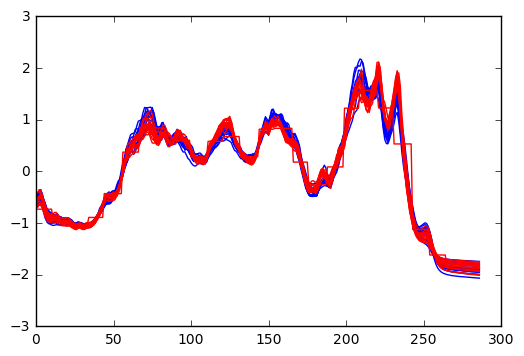

In [41]:
for idx in range(0, len(coffee_train)):
    if coffee_train_y[idx] == 0:
        plt.plot(coffee_train_x.loc[idx, :], 'b')
    else:
        plt.plot(coffee_train_x.loc[idx, :], 'r')
plt.show()

### Compute Accuracy

In [5]:
knn = KNN()
knn.fit(coffee_train_x, coffee_train_y)
acc(coffee_test_y, knn.predict(coffee_test_x))

0.9642857142857143

In [43]:
print(coffee_train_x.loc[22,:])

1     -0.730132
2     -0.730132
3     -0.730132
4     -0.730132
5     -0.730132
6     -0.730132
7     -0.730132
8     -0.730132
9     -0.730132
10    -0.730132
11    -0.950867
12    -0.950867
13    -0.950867
14    -0.950867
15    -0.950867
16    -0.950867
17    -0.950867
18    -0.950867
19    -0.950867
20    -0.950867
21    -0.950867
22    -0.950867
23    -1.043283
24    -1.043283
25    -1.043283
26    -1.043283
27    -1.043283
28    -1.043283
29    -1.043283
30    -1.043283
         ...   
257   -1.617085
258   -1.617085
259   -1.617085
260   -1.617085
261   -1.617085
262   -1.617085
263   -1.617085
264   -1.617085
265   -1.837392
266   -1.837392
267   -1.837392
268   -1.837392
269   -1.837392
270   -1.837392
271   -1.837392
272   -1.837392
273   -1.837392
274   -1.837392
275   -1.868490
276   -1.868490
277   -1.868490
278   -1.868490
279   -1.868490
280   -1.868490
281   -1.868490
282   -1.868490
283   -1.868490
284   -1.868490
285   -1.868490
286   -1.868490
Name: 22, dtype: float64

In [75]:
idx = 22
explainer = LimeTimeSeriesExplanation(class_names=['0', '1'])
data, labels, series = explainer.explain_instance(coffee_train_x.loc[idx, :], knn.predict_proba, num_features=len(coffee_train_x.loc[0, :]), training_set=coffee_train_x)
#print(explainer.__data_labels_distances(coffee_test_x[idx], knn.predict_proba, 10, 20, coffee_train_x))
plt.plot(series[1])
plt.show()
plt.plot(series[2])
plt.show()
plt.plot(series[3])
plt.show()

26
29


ValueError: cannot set using a slice indexer with a different length than the value